In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Test tensor flow instaliation

In [2]:
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


### 2. MNIST datasets  -- example

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
## download data from google, dump it to data.mnist
mnist= input_data.read_data_sets('data/mnist/',one_hot=True)

Extracting data/mnist/train-images-idx3-ubyte.gz
Extracting data/mnist/train-labels-idx1-ubyte.gz
Extracting data/mnist/t10k-images-idx3-ubyte.gz
Extracting data/mnist/t10k-labels-idx1-ubyte.gz


##### take a look at our data

(55000, 784)


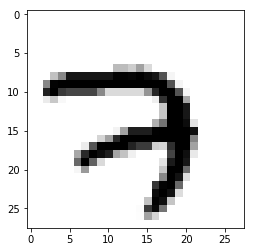

In [43]:
## take a look at our train data 
## each row is a flattened image
print(mnist.train.images.shape)
## take a look at an image
i = mnist.train.images[0].reshape(28,28)
plt.imshow(i,cmap='Greys')

In [44]:
## take a look at the labels for the picture
mnist.train.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

##### set up some paramaters 

In [45]:
## set up learning rate --- how fast you want it to learn 
learning_rate = 0.001    ## how big of a jump you want to take while optimizing
training_epochs = 25     ## how many training cycles you want to go through 
batch_size = 100         ## batch size

## shape you network layers 
n_classes = 10                        ## we have 0 - 9 numbers to be recognized 
n_samples = mnist.train.num_examples  ## training sample 
n_input = 784                         ## number of features, it is the size of our image pixels 

## set up your layers 
n_hidden_1 = 256                      ## 256 is commonly used for images, it is just the way computer saves colors 
n_hidden_2 = 256


In [46]:
def multilayer_perceptron(x,weights,biases):
    '''
    x: Placeholder for Data Input
    weights: Dict of weights 
    biases: dict of bias values  ---------- errors 
    '''
    # Fisrt Hidden Layer with RELU Activation
    # X * W + B
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    # Func(X * W + B) = RELU  -> f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden Layer
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output Layer 
    out_layer = tf.matmul(layer_2,weights['out']) + biases['out']
    
    return out_layer 

In [47]:
### initiate random weights and biases
weights = {
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),     # here, it is a 55000 by 256 matrix for initiation
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),   # here, it is a 256 by 256 matrix for initiation
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}
biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),     # here, it is a 55000 by 256 matrix for initiation
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),   # here, it is a 256 by 256 matrix for initiation
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [48]:
## set two place holder for x and y 
x = tf.placeholder('float',[None,n_input])              # training place holder
y = tf.placeholder('float',[None,n_classes])            # result place holder

In [49]:
## set up cost function and optimization function 
pred = multilayer_perceptron(x,weights,biases)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=pred))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

##### now train the model 

In [50]:
### launch a interactive session, and do things interactively 
### in production, you do not that interactive session 
sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)
## initiate a session 

In [52]:
## 15 loops  -- in real world, you will probably run thousands of iterations
for epoch in range(training_epochs):  #training_epochs
    #Cost 
    avg_cost = 0.0                           # set initial cost to be 0
    total_batch = int(n_samples/batch_size)   # calculate number of batches 
    for i in range(total_batch):
        batch_x,batch_y = mnist.train.next_batch(batch_size)                ## get training x and y from mnist data, for each batch 
        
        _,c = sess.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})   ## get the cost after 1 iteration 
        avg_cost += c/total_batch                                          ## add up cost for each batch 
    print("Epoch:{} cost:{:.4f}".format(epoch+1,avg_cost))
print("Model has completed {} Epochs of training".format(training_epochs))

Epoch:1 cost:47.2085
Epoch:2 cost:29.2690
Epoch:3 cost:20.1834
Epoch:4 cost:14.8160
Epoch:5 cost:10.9753
Epoch:6 cost:8.4736
Epoch:7 cost:6.4503
Epoch:8 cost:4.8048
Epoch:9 cost:3.6390
Epoch:10 cost:2.8173
Epoch:11 cost:2.0970
Epoch:12 cost:1.6535
Epoch:13 cost:1.3141
Epoch:14 cost:1.0210
Epoch:15 cost:0.7544
Epoch:16 cost:0.7022
Epoch:17 cost:0.6474
Epoch:18 cost:0.6115
Epoch:19 cost:0.4512
Epoch:20 cost:0.4913
Epoch:21 cost:0.4531
Epoch:22 cost:0.5117
Epoch:23 cost:0.4027
Epoch:24 cost:0.3098
Epoch:25 cost:0.3705
Epoch:26 cost:0.3563
Epoch:27 cost:0.3495
Epoch:28 cost:0.2758
Epoch:29 cost:0.3348
Epoch:30 cost:0.2968
Epoch:31 cost:0.3009
Epoch:32 cost:0.3100
Epoch:33 cost:0.1985
Epoch:34 cost:0.2988
Epoch:35 cost:0.2888
Epoch:36 cost:0.2661
Epoch:37 cost:0.2052
Epoch:38 cost:0.2456
Epoch:39 cost:0.1996
Epoch:40 cost:0.2191
Epoch:41 cost:0.1595
Epoch:42 cost:0.2796
Epoch:43 cost:0.1723
Epoch:44 cost:0.1942
Epoch:45 cost:0.1933
Epoch:46 cost:0.2090
Epoch:47 cost:0.1750
Epoch:48 cost:0.1

##### Model evaluations

In [54]:
## tf.equal() basicall check if x=y
## pred is essentially out output layer, which is our predictions 
correct_predictions = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))    ## returns a tf boolean array of correct predictions
correct_predictions = tf.cast(correct_predictions,'float')
accuracy = tf.reduce_mean(correct_predictions)                      ## get the mean of the o,1 array, which is the accuracy
#### this accuracy is still a tf object, we can pass test data into it 

In [55]:
## pass in test data and get the accuracy 
accuracy.eval({x:mnist.test.images,y:mnist.test.labels})

0.96619999